# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

# Observations and Inferences

1. **Effectiveness of Capomulin and Ramicane**:
   - The summary statistics table shows that both Capomulin and Ramicane have the lowest mean tumor volumes (40.68 mm³ and 40.22 mm³, respectively) compared to the other drug regimens. This suggests that these two drugs are the most effective in reducing tumor volume among the tested regimens.
   
2. **Outlier in Infubinol Treatment**:
   - The box plot reveals a significant outlier in the Infubinol treatment group. This outlier indicates that there was at least one mouse that experienced an unusually low tumor volume, suggesting variability in the effectiveness of Infubinol. This could be due to individual differences in response to the treatment or other experimental factors.

3. **Correlation between Mouse Weight and Tumor Volume in Capomulin Treatment**:
   - The scatter plot and subsequent linear regression analysis for the Capomulin treatment regimen show a positive correlation (correlation coefficient of approximately 0.84) between mouse weight and average observed tumor volume. This indicates that heavier mice tend to have larger tumor volumes when treated with Capomulin. It might suggest that dosing could be weight-dependent or that larger mice have different metabolic rates affecting tumor growth.


In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mice_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_mice_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [182]:
# Checking the number of mice.
unique_mice_count = len(complete_mice_data["Mouse ID"].unique())
unique_mice_count


249

In [183]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicates = complete_mice_data[complete_mice_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the 'Mouse ID's that have duplicate values
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

duplicate_mouse_ids



array(['g989'], dtype=object)

In [184]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_for_duplicate_mice = complete_mice_data[complete_mice_data['Mouse ID'].isin(duplicate_mouse_ids)]
all_data_for_duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [185]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_complete_mice_data = complete_mice_data[~complete_mice_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_complete_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [186]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_clean = len(cleaned_complete_mice_data["Mouse ID"].unique())
unique_mice_count_clean



248

## Summary Statistics

In [187]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_by_drug_regimen = cleaned_complete_mice_data.groupby("Drug Regimen")
mean_tv_drug_regimen = grouped_by_drug_regimen["Tumor Volume (mm3)"].mean()
median_tv_drug_regimen = grouped_by_drug_regimen["Tumor Volume (mm3)"].median()
variance_tv_drug_regimen = grouped_by_drug_regimen["Tumor Volume (mm3)"].var()
std_drug_tv_regimen = grouped_by_drug_regimen["Tumor Volume (mm3)"].std()
sem_drug_tv_regimen = grouped_by_drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_drug_regimen = pd.DataFrame({
    "Mean Tumor Volume"         : mean_tv_drug_regimen,
    "Median Tumor Volume"       : median_tv_drug_regimen,
    "Tumor Volume Variance"     : variance_tv_drug_regimen,
    "Tumor Volume Std. Dev."    : std_drug_tv_regimen,
    "Tumor Volume Std. Err."    : sem_drug_tv_regimen
})

summary_drug_regimen


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [188]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Calculate the required statistics for each group
grouped_stats_agg = grouped_by_drug_regimen["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
grouped_stats_agg_style = grouped_stats_agg.style.set_caption("<b>Tumor Volume (mm³)</b>")
grouped_stats_agg_style

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

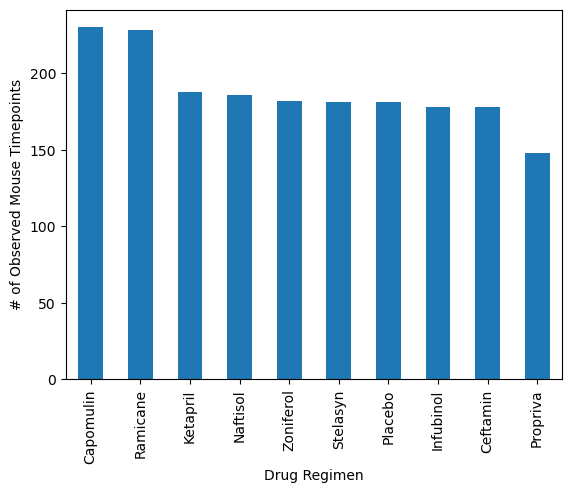

In [189]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
regimen_counts = cleaned_complete_mice_data['Drug Regimen'].value_counts()

# Create the bar plot using the plot method of the Series object
regimen_counts.plot(kind='bar')

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the plot
plt.show()


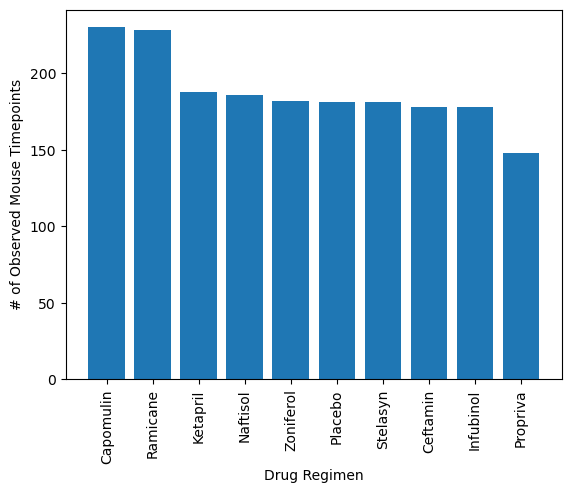

In [190]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts_per_mouse = grouped_by_drug_regimen["Mouse ID"].size()
sorted_drug_regimen_counts_per_mouse = drug_regimen_counts_per_mouse.sort_values(ascending=False)

# Add labels and title
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(sorted_drug_regimen_counts_per_mouse.index, sorted_drug_regimen_counts_per_mouse.values)

# Show the plot
plt.show()


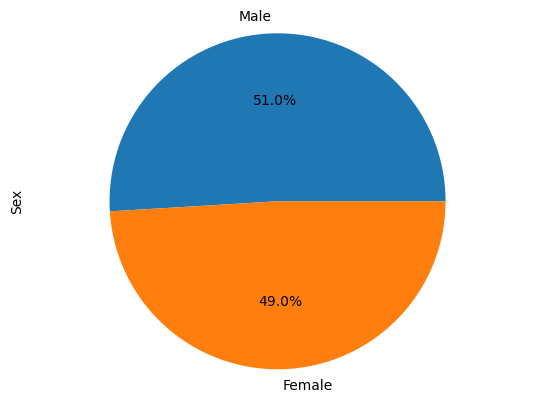

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count occurrences of each category in the "Sex" column
gender_counts = cleaned_complete_mice_data["Sex"].value_counts()

# Plot pie chart
gender_counts.plot(kind='pie', autopct="%1.1f%%")

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel("Sex")
plt.show()


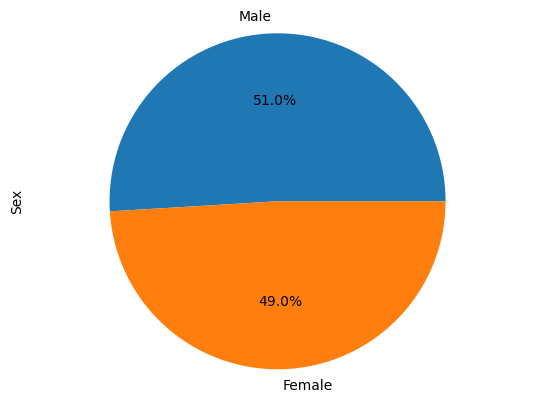

In [192]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# using the same gender_counts from above
plt.pie(gender_counts.values, labels=["Male", "Female"], autopct='%1.1f%%')

plt.axis("equal")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [193]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_filtered_df = cleaned_complete_mice_data[cleaned_complete_mice_data["Drug Regimen"].isin(drug_regimens_list)]

# Start by getting the last (greatest) timepoint for each mouse

# Determine the max indices for "Timepoint", grouped by "Mouse ID"
max_time_point_indices = regimen_filtered_df.groupby(["Mouse ID"])["Timepoint"].max()
max_time_point_indices = max_time_point_indices.reset_index()
max_time_point_indices.head()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [215]:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged_df = max_time_point_indices.merge(cleaned_complete_mice_data, how="left", on=["Mouse ID", "Timepoint"])
final_merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [214]:
# Put treatments into a list for for loop (and later for plot labels)
# drug_regimens_list from previous cell
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimens_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes_per_drug = final_merged_df[final_merged_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    Q1 = final_tumor_volumes_per_drug.quantile(0.25)
    Q2 = final_tumor_volumes_per_drug.median()
    Q3 = final_tumor_volumes_per_drug.quantile(0.75)
    IQR = Q3 - Q1


    outliers = final_merged_df[(final_merged_df["Drug Regimen"] == drug) &
                               (
                                    (final_merged_df["Tumor Volume (mm3)"] > (Q3 + 1.5 * IQR)) |
                                    (final_merged_df["Tumor Volume (mm3)"] < (Q1 - 1.5 * IQR))
                               )]["Tumor Volume (mm3)"]
    
    tumor_volume_data.append([drug, Q1, Q2, Q3, len(outliers), outliers])
    print(f"{drug}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


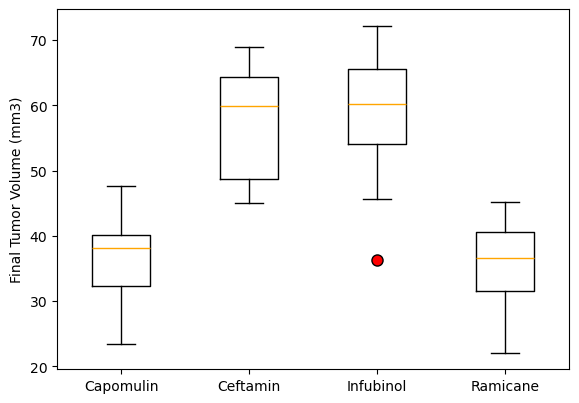

In [196]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final_merged_df.boxplot(column='Tumor Volume (mm3)',
                        by='Drug Regimen',
                         color=dict(
                             boxes='black',
                             whiskers='black',
                             medians='orange',
                             caps='black'
                             ),
                         flierprops=dict(
                             marker='o',
                             markerfacecolor='red',
                             markersize=8,
                             linestyle='none'
                             ),
                         grid=False
                         )


# Set labels and title
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('')  # To remove the automatic title
plt.suptitle('')  # To remove the automatic "by" title

# Set labels and title
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('')

# Show the plot
plt.show()

## Line and Scatter Plots

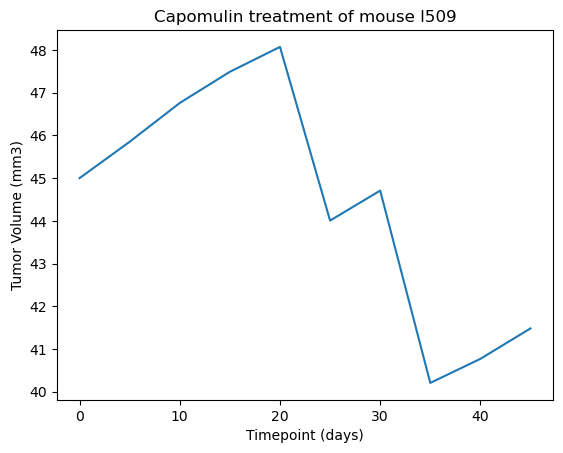

In [197]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

chosen_mouse_id = "l509"
data_for_chosen_mouse = cleaned_complete_mice_data[cleaned_complete_mice_data["Mouse ID"] == chosen_mouse_id]
data_for_capomulin = data_for_chosen_mouse[data_for_chosen_mouse["Drug Regimen"] == "Capomulin"]


plt.figure()
plt.plot(data_for_capomulin["Timepoint"], data_for_capomulin["Tumor Volume (mm3)"], linestyle='-')
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

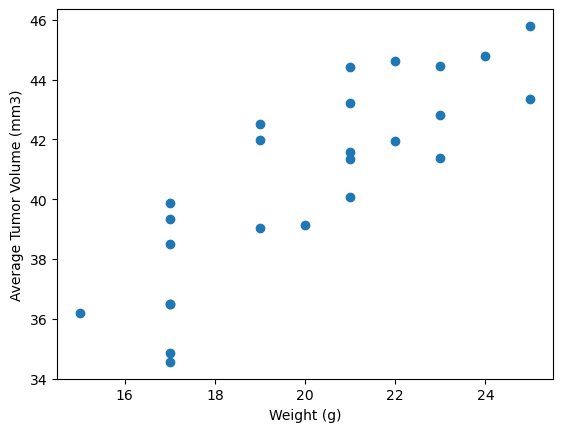

In [209]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data_for_capomulin = cleaned_complete_mice_data[cleaned_complete_mice_data["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID and calculate mean tumor volume
average_tumor_volume = data_for_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weights = data_for_capomulin.groupby("Mouse ID")["Weight (g)"].mean()

# Create scatter plot
plt.scatter(weights, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


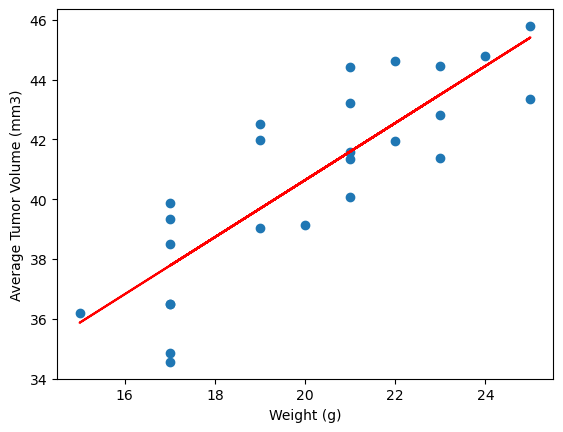

In [210]:
from scipy.stats import pearsonr, linregress
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, _ = pearsonr(weights, average_tumor_volume)
correlation_coefficient = round(correlation_coefficient, 2)

slope, intercept, r_value, p_value, std_err = linregress(weights, average_tumor_volume)

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

plt.scatter(weights, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(weights, slope * weights + intercept, color="red")

plt.show()
